In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [2]:
yogya_url = r'https://raw.githubusercontent.com/skwiliam/Coursera_Capstone/master/Inner_Yogyakarta_Urban_and_College.csv'


yogya = pd.read_csv(yogya_url, sep=',', decimal='.')
print('AREA IN INNER YOGYAKARTA')
display(yogya.sample(10))

AREA IN INNER YOGYAKARTA


,Name,Category,Sub District,City,Latitude,Longitude
0,AMBARKETAWANG,URBAN,GAMPING,SLEMAN,-7.805396,110.317874
37,TAHUNAN,URBAN,UMBULHARJO,YOGYAKARTA,-7.806743,110.383172
47,BRONTOKUSUMAN,URBAN,MERGANGSAN,YOGYAKARTA,-7.821676,110.372077
63,INSTITUT PERTANIAN STIPER,COLLEGE,DEPOK,SLEMAN,-7.761000,110.425078
59,UNIVERSITAS MUHAMMADIYAH YOGYAKARTA,COLLEGE,KASIHAN,BANTUL,-7.809407,110.322618
67,UNIVERSITAS GADJAH MADA,COLLEGE,DEPOK,SLEMAN,-7.767706,110.378530
33,MUJA MUJU,URBAN,UMBULHARJO,YOGYAKARTA,-7.798672,110.392711
62,AKADEMI KOMUNIKASI YOGYAKARTA,COLLEGE,DEPOK,SLEMAN,-7.814342,110.375716
17,PATANGPULUHAN,URBAN,WIROBRAJAN,YOGYAKARTA,-7.809790,110.348938
27,KADIPATEN,URBAN,KRATON,YOGYAKARTA,-7.807514,110.359273


In [3]:
map_yogya = folium.Map(location=[-7.7956, 110.3695], zoom_start=13)

# add URBAN markers to map
for lat, lng, name, cat, subdis, cit in zip(yogya['Latitude'], yogya['Longitude']
                                      , yogya['Name'], yogya['Category'], yogya['Sub District'], yogya['City']):
    label = '{}, {}, {}'.format(name, subdis, cit)
    label = folium.Popup(label, parse_html=True)
    if cat == 'URBAN':
      folium.CircleMarker(
          [lat, lng],
          radius=5,
          popup=label,
          color='red',
          fill=True,
          fill_color='red',
          fill_opacity=0.7,
          parse_html=False).add_to(map_yogya)  
    else:
      folium.CircleMarker(
          [lat, lng],
          radius=5,
          popup=label,
          color='blue',
          fill=True,
          fill_color='blue',
          fill_opacity=0.7,
          parse_html=False).add_to(map_yogya)
map_yogya

In [4]:
CLIENT_ID = 'P3C1BGPC5HSONKGW15DS0I33DEKB1DSYOTLOU4O2WWDWDL2P' # your Foursquare ID
CLIENT_SECRET = 'WOZXAR5GUYSNQKNZIVPAWHC5ZTDBDG5GM3SHIKOJKHPE5ESI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']




radius = 500 # define radius
LIMIT = 100 # limit of number of venues returned by Foursquare API

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
      print(name)
            
      # create the API request URL
      url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
          CLIENT_ID, 
          CLIENT_SECRET, 
          VERSION, 
          lat, 
          lng, 
          radius, 
          LIMIT)
          
      # make the GET request
      results = requests.get(url).json()["response"]['groups'][0]['items']

      # return only relevant information for each nearby venue
      venues_list.append([(
          name, 
          lat, 
          lng, 
          v['venue']['name'], 
          v['venue']['location']['lat'], 
          v['venue']['location']['lng'],  
          v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Place', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Your credentails:
CLIENT_ID: P3C1BGPC5HSONKGW15DS0I33DEKB1DSYOTLOU4O2WWDWDL2P
CLIENT_SECRET:WOZXAR5GUYSNQKNZIVPAWHC5ZTDBDG5GM3SHIKOJKHPE5ESI


In [5]:
print('+++++++++++++++++++++++++++GET URBAN VENUE+++++++++++++++++++++++++++')
yogya_venues = getNearbyVenues(names=yogya['Name'],
                                   latitudes=yogya['Latitude'],
                                   longitudes=yogya['Longitude'])

+++++++++++++++++++++++++++GET URBAN VENUE+++++++++++++++++++++++++++
AMBARKETAWANG
NGESTIHARJO
JAGALAN
SINGOSAREN
BANGUNTAPAN
BATURETNO
POTORONO
SIDOMOYO
SIDOARUM
BANYURADEN
NOGOTIRTO
TRIHANGGO
SINDUADI
CONDONG CATUR
CATUR TUNGGAL
MAGUWOHARJO
SENDANG TIRTO
PATANGPULUHAN
WIROBRAJAN
TEGALREJO
PAKUNCEN
BENER
GEDONGKIWO
NGAMPILAN
NOTOPRAJAN
SURYODININGRATAN
PATEHAN
KADIPATEN
KRICAK
BACIRO
DEMANGAN
KLITREN
KOTABARU
MUJA MUJU
NGUPASAN
SEMAKI
SURYATMAJAN
TAHUNAN
TEGAL PANGGUNG
TERBAN
WARUNGBOTO
BUMIJO
MANTRIJERON
PANEMBAHAN
KARANGWARU
PRAWIRODIRJAN
COKRODININGRATAN
BRONTOKUSUMAN
KEPARAKAN
WIROGUNAN
SOROSUTAN
GOWONGAN
PANDEYAN
GIWANGAN
REJOWINANGUN
PRENGGAN
PURBAYAN
SEKOLAH TINGGI TEKNIK LINGKUNGAN
STMIK AKAKOM
UNIVERSITAS MUHAMMADIYAH YOGYAKARTA
UNIVERSITAS PGRI YOGYAKARTA
UNIVERSITAS TEKNOLOGI YOGYAKARTA
AKADEMI KOMUNIKASI YOGYAKARTA
INSTITUT PERTANIAN STIPER
POLITEKNIK API
SEKOLAH TINGGI PARIWISATA AMPTA YOGYAKARTA
UNIVERSITAS ATMA JAYA YOGYAKARTA
UNIVERSITAS GADJAH MADA
UNIVERSITAS NEGERI

In [0]:
yogya_venues.to_csv('yogya_venue.csv')

In [7]:
print('VENUE')
print(yogya_venues.shape)
display(yogya_venues.sample(10))

VENUE
(1431, 7)


,Place,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
593,TERBAN,-7.779295,110.375544,Indiecology Cafe,-7.780888,110.377091,Café
1245,UNIVERSITAS ATMA JAYA YOGYAKARTA,-7.776294,110.392642,Hana Music,-7.775787,110.395670,Music Venue
320,DEMANGAN,-7.784871,110.390029,Matahari,-7.784006,110.390565,Department Store
956,GOWONGAN,-7.785946,110.365915,Grand Zuri Hotel,-7.787646,110.366586,Hotel
1235,UNIVERSITAS ATMA JAYA YOGYAKARTA,-7.776294,110.392642,Loops Cafe,-7.778815,110.394454,Ice Cream Shop
455,SEMAKI,-7.797846,110.383737,Siomay Mandala krida,-7.795626,110.383112,Asian Restaurant
188,NOTOPRAJAN,-7.804768,110.354997,Jamu Serangan,-7.801159,110.356327,Pharmacy
880,BRONTOKUSUMAN,-7.821676,110.372077,havermeelkoek,-7.820035,110.370896,Cupcake Shop
1163,SEKOLAH TINGGI PARIWISATA AMPTA YOGYAKARTA,-7.778416,110.403523,Ambarukmo Restaurant & caffe,-7.782055,110.403056,Breakfast Spot
647,BUMIJO,-7.784835,110.359477,Kartika Dewi Fitness Centre,-7.782801,110.359715,Gym / Fitness Center


In [8]:
yogya_venues['Venue Category'].unique()


array(['Asian Restaurant', 'Lake', 'Arcade', 'Sporting Goods Shop',
       'Electronics Store', 'Candy Store', 'Noodle House', 'Pharmacy',
       'Pool', 'Soup Place', 'Diner', 'Park', 'Clothing Store',
       'Recreation Center', 'Food & Drink Shop', 'Fish & Chips Shop',
       'Department Store', 'Bakery', 'Food Truck', 'Chinese Restaurant',
       'Javanese Restaurant', 'Fast Food Restaurant', 'Convenience Store',
       'BBQ Joint', 'Restaurant', 'Flea Market', 'Coffee Shop',
       'Indonesian Restaurant', 'Shoe Store', 'Nightclub', 'Café',
       'Japanese Restaurant', 'Gym / Fitness Center', 'Food Court',
       'College Academic Building', 'Juice Bar', 'Fried Chicken Joint',
       'Plaza', 'Bowling Alley', 'Hotel', 'Miscellaneous Shop',
       'Arts & Crafts Store', 'Supermarket', 'Soccer Field', 'Steakhouse',
       'Thai Restaurant', 'Spa', 'History Museum', 'Hotel Bar',
       'Grocery Store', 'Art Museum', 'Art Gallery', 'Gym',
       'Paper / Office Supplies Store', 'Snac

In [9]:
yogya_venues.groupby('Place').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Place,,,,,,
AKADEMI KOMUNIKASI YOGYAKARTA,17,17,17,17,17,17
AKADEMI PERIKANAN YOGYAKARTA,10,10,10,10,10,10
AMBARKETAWANG,1,1,1,1,1,1
BACIRO,15,15,15,15,15,15
BANGUNTAPAN,1,1,1,1,1,1
...,...,...,...,...,...,...
UNIVERSITAS TEKNOLOGI YOGYAKARTA,11,11,11,11,11,11
UPN VETERAN YOGYAKARTA,21,21,21,21,21,21
WARUNGBOTO,10,10,10,10,10,10


In [10]:
print('There are {} uniques categories.'.format(len(yogya_venues['Venue Category'].unique())))

There are 175 uniques categories.


In [11]:
# one hot encoding
yogya_onehot = pd.get_dummies(yogya_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
yogya_onehot['Place'] = yogya_venues['Place'] 

# move neighborhood column to the first column
fixed_columns = [yogya_onehot.columns[-1]] + list(yogya_onehot.columns[:-1])
yogya_onehot = yogya_onehot[fixed_columns]

yogya_onehot.head()

,Place,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Batik Shop,Beach,Bed & Breakfast,Beer Garden,Betawinese Restaurant,Bike Rental / Bike Share,Bistro,Boarding House,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Café,Camera Store,Candy Store,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Administrative Building,...,Pub,Radio Station,Record Shop,Recreation Center,Rental Car Location,Restaurant,Road,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Sundanese Restaurant,Supermarket,Tech Startup,Thai Restaurant,Theater,Theme Park,Track Stadium,Train,Train Station,Tree,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Yoga Studio
0,AMBARKETAWANG,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NGESTIHARJO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NGESTIHARJO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NGESTIHARJO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NGESTIHARJO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
yogya_onehot.shape

(1431, 176)

In [13]:
yogya_grouped = yogya_onehot.groupby('Place').mean().reset_index()
yogya_grouped.head(20)

,Place,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Batik Shop,Beach,Bed & Breakfast,Beer Garden,Betawinese Restaurant,Bike Rental / Bike Share,Bistro,Boarding House,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Café,Camera Store,Candy Store,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Administrative Building,...,Pub,Radio Station,Record Shop,Recreation Center,Rental Car Location,Restaurant,Road,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Sundanese Restaurant,Supermarket,Tech Startup,Thai Restaurant,Theater,Theme Park,Track Stadium,Train,Train Station,Tree,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Yoga Studio
0,AKADEMI KOMUNIKASI YOGYAKARTA,0.000000,0.000000,0.0,0.0,0.000000,0.058824,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.058824,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.058824,0.000000,0.000000,0.0,0.000000,0.058824,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0
1,AKADEMI PERIKANAN YOGYAKARTA,0.000000,0.000000,0.0,0.0,0.000000,0.200000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.100,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.100000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0
2,AMBARKETAWANG,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0
3,BACIRO,0.066667,0.000000,0.0,0.0,0.000000,0.266667,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.066667,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.066667,0.000000,0.00,0.0,0.0,0.0,0.0,0.066667,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.066667,0.000000,0.000000,0.0,0.0,0.00,0.066667,0.0
4,BANGUNTAPAN,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0
5,BANYURADEN,0.000000,0.000000,0.0,0.0,0.000000,0.250000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00

In [14]:
yogya_grouped.shape

(76, 176)

In [15]:
num_top_venues = 5

for hood in yogya_grouped['Place']:
    print("----"+hood+"----")
    temp = yogya_grouped[yogya_grouped['Place'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----AKADEMI KOMUNIKASI YOGYAKARTA----
                   venue  freq
0  Indonesian Restaurant  0.12
1             Soup Place  0.06
2         History Museum  0.06
3      French Restaurant  0.06
4    Fried Chicken Joint  0.06


----AKADEMI PERIKANAN YOGYAKARTA----
                venue  freq
0    Asian Restaurant   0.2
1           Pet Store   0.1
2               Hotel   0.1
3  Seafood Restaurant   0.1
4             Stadium   0.1


----AMBARKETAWANG----
                 venue  freq
0     Asian Restaurant   1.0
1  American Restaurant   0.0
2               Office   0.0
3      Motorcycle Shop   0.0
4        Movie Theater   0.0


----BACIRO----
                 venue  freq
0     Asian Restaurant  0.27
1         Noodle House  0.13
2  American Restaurant  0.07
3        Track Stadium  0.07
4       Soccer Stadium  0.07


----BANGUNTAPAN----
                 venue  freq
0               Arcade   1.0
1  Indie Movie Theater   0.0
2                Motel   0.0
3      Motorcycle Shop   0.0
4        Movi

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Place']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
yogya_venues_sorted = pd.DataFrame(columns=columns)
yogya_venues_sorted['Place'] = yogya_grouped['Place']

for ind in np.arange(yogya_grouped.shape[0]):
    yogya_venues_sorted.iloc[ind, 1:] = return_most_common_venues(yogya_grouped.iloc[ind, :], num_top_venues)

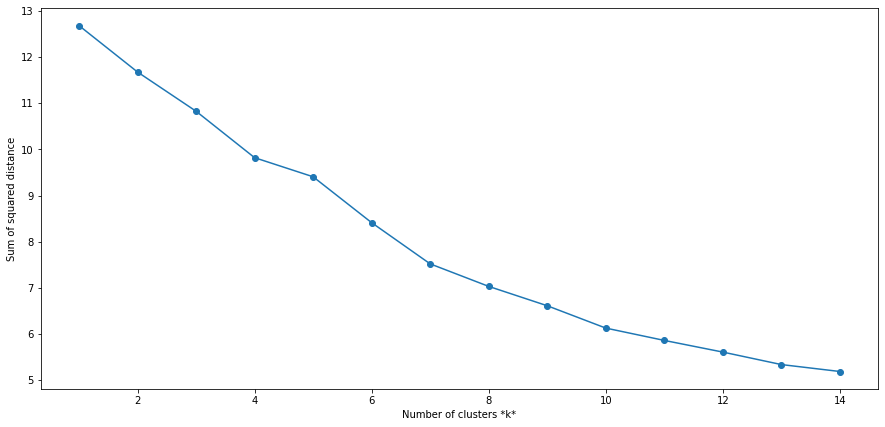

In [17]:
import matplotlib.pyplot as plt


yogya_grouped_clustering = yogya_grouped.drop('Place', 1)

sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(yogya_grouped_clustering)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(15, 7))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [18]:
# set number of clusters
kclusters = 7


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(yogya_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10] )

# add clustering labels
yogya_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


[2 2 1 2 4 2 3 2 2 2]


In [19]:
yogya_merged = yogya
yogya_merged = yogya_merged.join(yogya_venues_sorted.set_index('Place'), on='Name')
yogya_merged.dropna(axis=0, inplace=True)
yogya_merged['Cluster Labels'] = yogya_merged['Cluster Labels'].astype(int)
yogya_merged.sample(15)

,Name,Category,Sub District,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,SURYATMAJAN,URBAN,DANUREJAN,YOGYAKARTA,-7.792839,110.367340,2,Hotel,Indonesian Restaurant,Coffee Shop,Food Truck,Asian Restaurant,Soup Place,Snack Place,Breakfast Spot,Bookstore,Fast Food Restaurant
40,WARUNGBOTO,URBAN,UMBULHARJO,YOGYAKARTA,-7.808213,110.390206,2,Fast Food Restaurant,Garden,Seafood Restaurant,Convenience Store,Indonesian Restaurant,Spa,Javanese Restaurant,Café,Bakery,Coffee Shop
58,STMIK AKAKOM,COLLEGE,BANGUNTAPAN,BANTUL,-7.793459,110.407198,3,Food Truck,BBQ Joint,Yoga Studio,Dumpling Restaurant,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fair,Event Space
21,BENER,URBAN,TEGALREJO,YOGYAKARTA,-7.776131,110.352393,2,Ice Cream Shop,Bike Rental / Bike Share,Dessert Shop,Massage Studio,Electronics Store,Flea Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market
52,PANDEYAN,URBAN,UMBULHARJO,YOGYAKARTA,-7.818311,110.388408,2,Soup Place,Art Museum,Café,Bakery,Breakfast Spot,Arts & Crafts Store,Indonesian Restaurant,Beach,Coffee Shop,Yoga Studio
16,SENDANG TIRTO,URBAN,BERBAH,SLEMAN,-7.815157,110.433212,6,Bowling Alley,Concert Hall,Flea Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fair,Event Space,Electronics Store
73,UNIVERSITAS AHMAD DAHLAN,COLLEGE,UMBULHARJO,YOGYAKARTA,-7.798661,110.382997,2,Asian Restaurant,Food Truck,Indonesian Restaurant,Soccer Stadium,Radio Station,Stadium,Restaurant,Noodle House,Track Stadium,Department Store
34,NGUPASAN,URBAN,GONDOMANAN,YOGYAKARTA,-7.804683,110.371248,2,Food Court,Chinese Restaurant,Food & Drink Shop,Supermarket,Soup Place,Spa,Movie Theater,Fried Chicken Joint,Pool Hall,Diner
60,UNIVERSITAS PGRI YOGYAKARTA,COLLEGE,KASIHAN,BANTUL,-7.805787,110.341402,3,Convenience Store,Art Gallery,Department Store,Café,Office,Eastern European Restaurant,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market
51,GOWONGAN,URBAN,JETIS,YOGYAKARTA,-7.785946,110.365915,2,Hotel,Asian Restaurant,Food Truck,Indonesian Restaurant,Coffee Shop,Café,Restaurant,Breakfast Spot,Bakery,Noodle House


In [0]:
# create map
map_clusters = folium.Map(location=[-7.7956, 110.3695], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for lat, lon, poi, cat, cluster in zip(yogya_merged['Latitude'], yogya_merged['Longitude'],
                                  yogya_merged['Name'], yogya_merged['Category'], yogya_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    if cat == 'URBAN':
      folium.CircleMarker(
          [lat, lon],
          radius=5,
          popup=label,
          color=rainbow[cluster-1],
          fill=True,
          fill_color=rainbow[cluster-1],
          fill_opacity=0.7).add_to(map_clusters)
    else:
      folium.CircleMarker(
          [lat, lon],
          radius=5,
          popup=label,
          color=rainbow[cluster-1],
          fill=True,
          fill_color='black',
          fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [23]:
yogya0 = yogya_merged.loc[yogya_merged['Cluster Labels'] == 0, yogya_merged.columns[[0,1] + list(range(6, yogya_merged.shape[1]))]]
yogya0u = yogya0.loc[yogya_merged['Category'] == 'URBAN', yogya_merged.columns[[0,1] + list(range(6, yogya_merged.shape[1]))]]
yogya0c = yogya0.loc[yogya_merged['Category'] == 'COLLEGE', yogya_merged.columns[[0,1] + list(range(6, yogya_merged.shape[1]))]]

display(yogya0u)

,Name,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,NGESTIHARJO,URBAN,0,Arcade,Sporting Goods Shop,Electronics Store,Lake,Yoga Studio,Eastern European Restaurant,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market
15,MAGUWOHARJO,URBAN,0,Lake,Yoga Studio,Flower Shop,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fair,Event Space,Electronics Store


In [24]:
yogya1 = yogya_merged.loc[yogya_merged['Cluster Labels'] == 1, yogya_merged.columns[[0,1] + list(range(6, yogya_merged.shape[1]))]]
yogya1u = yogya1.loc[yogya_merged['Category'] == 'URBAN', yogya_merged.columns[[0,1] + list(range(6, yogya_merged.shape[1]))]]
yogya1c = yogya1.loc[yogya_merged['Category'] == 'COLLEGE', yogya_merged.columns[[0,1] + list(range(6, yogya_merged.shape[1]))]]

display(yogya1u)
display(yogya1c)

,Name,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AMBARKETAWANG,URBAN,1,Asian Restaurant,Yoga Studio,Dumpling Restaurant,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fair,Event Space,Electronics Store
7,SIDOMOYO,URBAN,1,Fish & Chips Shop,Department Store,Asian Restaurant,Bakery,Yoga Studio,Eastern European Restaurant,Flea Market,Field,Fast Food Restaurant,Farmers Market


,Name,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [25]:
yogya2 = yogya_merged.loc[yogya_merged['Cluster Labels'] == 2, yogya_merged.columns[[0,1] + list(range(6, yogya_merged.shape[1]))]]
yogya2u = yogya2.loc[yogya_merged['Category'] == 'URBAN', yogya_merged.columns[[0,1] + list(range(6, yogya_merged.shape[1]))]]
yogya2c = yogya2.loc[yogya_merged['Category'] == 'COLLEGE', yogya_merged.columns[[0,1] + list(range(6, yogya_merged.shape[1]))]]

display(yogya2u.sample(10))
display(yogya2c.sample(10))

,Name,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,GOWONGAN,URBAN,2,Hotel,Asian Restaurant,Food Truck,Indonesian Restaurant,Coffee Shop,Café,Restaurant,Breakfast Spot,Bakery,Noodle House
41,BUMIJO,URBAN,2,Hotel,Chinese Restaurant,Food Truck,Noodle House,BBQ Joint,Bakery,Snack Place,Coffee Shop,Restaurant,Breakfast Spot
49,WIROGUNAN,URBAN,2,Asian Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Steakhouse,Indonesian Restaurant,Fried Chicken Joint,Motel,Noodle House,Convenience Store,Café
42,MANTRIJERON,URBAN,2,Hotel,Convenience Store,Bar,Coffee Shop,Café,Indonesian Restaurant,Fried Chicken Joint,Historic Site,Gay Bar,Park
32,KOTABARU,URBAN,2,Coffee Shop,Café,Cosmetics Shop,Food Truck,Asian Restaurant,Hotel,Fast Food Restaurant,Soup Place,Indonesian Restaurant,Snack Place
37,TAHUNAN,URBAN,2,Indonesian Restaurant,Asian Restaurant,Music Venue,Breakfast Spot,Yoga Studio,Eastern European Restaurant,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market
43,PANEMBAHAN,URBAN,2,Indonesian Restaurant,Historic Site,Food Court,Javanese Restaurant,BBQ Joint,Castle,Asian Restaurant,Diner,Shopping Mall,Karaoke Bar
40,WARUNGBOTO,URBAN,2,Fast Food Restaurant,Garden,Seafood Restaurant,Convenience Store,Indonesian Restaurant,Spa,Javanese Restaurant,Café,Bakery,Coffee Shop
29,BACIRO,URBAN,2,Asian Restaurant,Noodle House,American Restaurant,Gym,Coffee Shop,Food Truck,Stadium,Gastropub,Soccer Stadium,Vegetarian / Vegan Restaurant
44,KARANGWARU,URBAN,2,Asian Restaurant,Convenience Store,Hotel,Soup Place,Noodle House,Furniture / Home Store,Kids Store,Steakhouse,Diner,Javanese Restaurant


,Name,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
64,POLITEKNIK API,COLLEGE,2,Noodle House,Coffee Shop,BBQ Joint,Sports Club,Karaoke Bar,Bubble Tea Shop,Convenience Store,Indonesian Restaurant,Dessert Shop,Creperie
59,UNIVERSITAS MUHAMMADIYAH YOGYAKARTA,COLLEGE,2,Arcade,Paper / Office Supplies Store,Asian Restaurant,Burrito Place,Pub,Diner,Music Venue,Yoga Studio,Eastern European Restaurant,Field
74,UNIVERSITAS COKROAMINOTO,COLLEGE,2,Supermarket,Convenience Store,Indonesian Restaurant,Department Store,Grocery Store,Coffee Shop,Bakery,Dumpling Restaurant,Field,Fast Food Restaurant
68,UNIVERSITAS NEGERI YOGYAKARTA,COLLEGE,2,Arcade,Indonesian Restaurant,Japanese Restaurant,Food Court,Asian Restaurant,Fast Food Restaurant,Concert Hall,College Administrative Building,Food Truck,Pool
75,UNIVERSITAS SARJANAWIYATA TAMANSISWA,COLLEGE,2,Pharmacy,Hotel,Fast Food Restaurant,Indonesian Restaurant,Asian Restaurant,Café,Javanese Restaurant,Fried Chicken Joint,Coffee Shop,Yoga Studio
72,AKADEMI PERIKANAN YOGYAKARTA,COLLEGE,2,Asian Restaurant,Hotel,Stadium,Department Store,Diner,Seafood Restaurant,Food Truck,Pet Store,Indonesian Restaurant,Gym
70,UNIVERSITAS PROKLAMASI 45,COLLEGE,2,Coffee Shop,Convenience Store,Noodle House,Breakfast Spot,Soup Place,Sports Club,Fried Chicken Joint,Karaoke Bar,Bubble Tea Shop,Indonesian Restaurant
66,UNIVERSITAS ATMA JAYA YOGYAKARTA,COLLEGE,2,Indonesian Restaurant,Ice Cream Shop,Chinese Restaurant,Vegetarian / Vegan Restaurant,Convenience Store,Hotel,Food Truck,Café,Thai Restaurant,Coffee Shop
62,AKADEMI KOMUNIKASI YOGYAKARTA,COLLEGE,2,Indonesian Restaurant,Convenience Store,Noodle House,Mobile Phone Shop,Café,Soup Place,Electronics Store,French Restaurant,Fried Chicken Joint,Fast Food Restaurant
67,UNIVERSITAS GADJAH MADA,COLLEGE,2,Asian Restaurant,Japanese Restaurant,Indonesian Restaurant,Convenience Store,Javanese Restaurant,Flea Market,Coffee Shop,Soup Place,Café,Salon / Barbershop


In [26]:
yogya3 = yogya_merged.loc[yogya_merged['Cluster Labels'] == 3, yogya_merged.columns[[0,1] + list(range(6, yogya_merged.shape[1]))]]
yogya3u = yogya3.loc[yogya_merged['Category'] == 'URBAN', yogya_merged.columns[[0,1] + list(range(6, yogya_merged.shape[1]))]]
yogya3c = yogya3.loc[yogya_merged['Category'] == 'COLLEGE', yogya_merged.columns[[0,1] + list(range(6, yogya_merged.shape[1]))]]

display(yogya3u.sample(5))
display(yogya3c)

,Name,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,NOGOTIRTO,URBAN,3,Convenience Store,BBQ Joint,Dumpling Restaurant,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fair,Event Space,Electronics Store
5,BATURETNO,URBAN,3,Soup Place,Park,Pool,Diner,Cosmetics Shop,Creperie,Field,Fast Food Restaurant,Farmers Market,Fair
11,TRIHANGGO,URBAN,3,Flea Market,BBQ Joint,Diner,Restaurant,Dumpling Restaurant,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fair
50,SOROSUTAN,URBAN,3,Javanese Restaurant,Food,Café,Diner,Convenience Store,Department Store,Dessert Shop,Flea Market,Fish & Chips Shop,Field
22,GEDONGKIWO,URBAN,3,Café,Pizza Place,Supermarket,Plaza,Coffee Shop,Diner,Soup Place,Food Truck,Convenience Store,Gym


,Name,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
58,STMIK AKAKOM,COLLEGE,3,Food Truck,BBQ Joint,Yoga Studio,Dumpling Restaurant,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fair,Event Space
60,UNIVERSITAS PGRI YOGYAKARTA,COLLEGE,3,Convenience Store,Art Gallery,Department Store,Café,Office,Eastern European Restaurant,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market


In [27]:
yogya4 = yogya_merged.loc[yogya_merged['Cluster Labels'] == 4, yogya_merged.columns[[0,1] + list(range(6, yogya_merged.shape[1]))]]
yogya4.sample()

,Name,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,BANGUNTAPAN,URBAN,4,Arcade,Yoga Studio,Dumpling Restaurant,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fair,Event Space,Electronics Store


In [28]:
yogya5 = yogya_merged.loc[yogya_merged['Cluster Labels'] == 5, yogya_merged.columns[[0,1] + list(range(6, yogya_merged.shape[1]))]]
yogya5.sample()

,Name,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,JAGALAN,URBAN,5,Candy Store,Yoga Studio,Concert Hall,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fair,Event Space,Electronics Store


In [29]:
yogya6 = yogya_merged.loc[yogya_merged['Cluster Labels'] == 6, yogya_merged.columns[[0,1] + list(range(6, yogya_merged.shape[1]))]]
yogya6.sample()

,Name,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,SENDANG TIRTO,URBAN,6,Bowling Alley,Concert Hall,Flea Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fair,Event Space,Electronics Store
